In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# reading the web Traffic data
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [17]:
# splitting the data into X and y
print(data.dtype)

X = data[:,0]
y = data[:,1]

print("total X :", len(X))
print("total X :", len(y))

float64
total X : 743
total X : 743


In [26]:
# checking if any value in y is NA or nan which is not required for us to calculation
print(np.sum(X==np.nan))  ## this calc is wrong as we can not compare the NA or nan with any value
print(np.sum(np.isnan(X)))

print(np.sum(y==np.nan))  ## 
print(np.sum(np.isnan(y)))

0
0
0
8


In [28]:
# so y is having 8 NaN or NA in the data so filtering the
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

print(len(X), len(y))

735 735


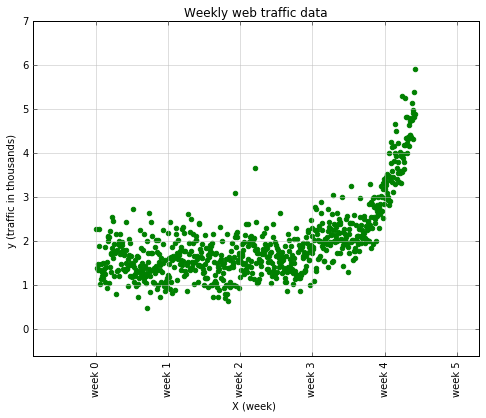

In [49]:
## Plotting the data 

#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

In [50]:
# Chossing the model

# creating the rss error func
def rssErr(f, x, y):
    return(np.sum((y-f(x))**2))   

** Fitting a linear model fp1 **

In [63]:
# starting with linear model where degree is 1
# polyfit() - best put that line into the chart so that it results in the smallest
# approximation error

fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full=True)
fp1

array([   2.59619213,  989.02487106])

    Linear Function :
    f(x) = 2.59619213 + 989.02487106 * x

In [68]:
print(residuals)
print(rank, sv, rcond)

[  3.17389767e+08]
2 [ 1.36699071  0.36240365] 1.6320278462e-13


In [65]:
# fitting these value in a linear model
f1 = sp.poly1d(fp1)
f1

poly1d([   2.59619213,  989.02487106])

In [71]:
# checking put the error for fp1 model
rssErr(f1, X, y)

317389767.33977801

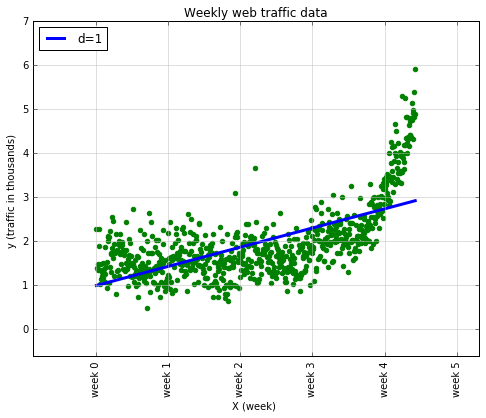

In [75]:
# plotting it
#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')
plt.plot(X, f1(X), color='blue', linewidth=3)   #plotting the fucntions

# adding legends
plt.legend(["d=%i" % f1.order], loc="upper left")

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

** Fitting the model with polynomial degree of 2 **

In [67]:
fp2 = sp.polyfit(X, y, 2)
fp2

array([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [69]:
# fitting the model
f2 = sp.poly1d(fp2)
f2

poly1d([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [70]:
# checking put the error for fp1 model
rssErr(f2, X, y)

179983507.87817919

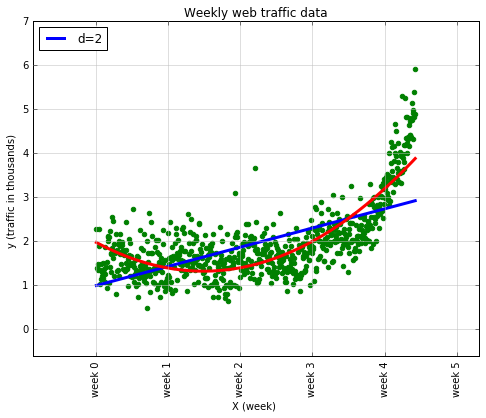

In [78]:
# plotting it
#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')
plt.plot(X, f1(X), color='blue', linewidth=3)   #plotting the fucntions
plt.plot(X, f2(X), color='red', linewidth=3)   #plotting the fucntions

# adding legends
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.legend(["d=%i" % f2.order], loc="upper left")

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()